<a href="https://colab.research.google.com/github/joanna00329/Feature-Selection-AirBnB/blob/main/Feature_Selection_AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok II
1. Elizabeth Lovena - 222101873
2. Joanna Gracia Tan - 222200329
3. Justin Habel Kiswanto - 212100103

## Read the CSV

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("AirBnB_Open_Data.csv")
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_14220\972702751.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AirBnB_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [ ]:
# Menampilkan baris yang memiliki nilai NaN
df_with_nan = df[df.isna().any(axis=1)]
display(df_with_nan.head(5))

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


## Check Data Anomalities
Dilakukan untuk mengecek beberapa masalah yang ada pada dataset seperti apakah ada nilai yang hilang, tipe data masing-masing kolom, jumlah data unik pada setiap kolom, dan apakah ada data duplikat

In [ ]:
print("Jumlah nilai yang hilang per kolom:")
df.isnull().sum()

Jumlah nilai yang hilang per kolom:


id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [ ]:
df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

In [ ]:
df.nunique()

id                                102058
NAME                               61281
host id                           102057
host_identity_verified                 2
host name                          13190
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
house_rules     

In [ ]:
dups = df.duplicated()
print(dups.any())
display(df[dups].head(5))

True


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102058,35506831,Master Bedroom with private Bathroom & Balcony,55110690425,unconfirmed,UZeyir,Queens,Maspeth,40.74056,-73.90635,United States,...,$141,1.0,1.0,11/14/2021,0.27,3.0,1.0,339.0,NaN,NaN
102059,35507383,Cozy 2 br in sunny Fort Greene apt,80193772189,verified,Sally,Brooklyn,Fort Greene,40.68701,-73.97555,United States,...,$130,3.0,38.0,11/13/2021,0.27,3.0,1.0,0.0,NaN,NaN
102060,35507935,Duplex w/ Terrace @ Box House Hotel,72991962259,verified,The Box House Hotel,Brooklyn,Greenpoint,40.73756,-73.95350,United States,...,$181,3.0,10.0,11/13/2021,0.08,3.0,30.0,32.0,NaN,NaN
102061,35508488,"Cozy, clean Greenpoint room with yard access",74975156081,verified,Dawn,Brooklyn,Greenpoint,40.72516,-73.95004,United States,...,$118,30.0,38.0,11/13/2021,0.34,5.0,2.0,324.0,NaN,NaN
102062,35509040,2BR XL Loft: Cleaning CDC guidelines implemented,85844415221,unconfirmed,Vida,Brooklyn,Greenpoint,40.72732,-73.94185,United States,...,$71,30.0,13.0,11/13/2021,0.14,4.0,28.0,336.0,NaN,NaN


# Data Cleaning
Berdasarkan pengecekan yang dilakukan maka disimpulkan bahwa perlu dilakukan imputasi data untuk data hilang, pembuangan data yang bernilai unik, pembuangan baris data yang duplikat, dan perubahan tipe data price dan service fee menjadi float

## Menghapus Kolom yang Tidak Diperlukan

Alasan Penghapusan
1. id dan NAME adalah id dan nama dari tempat tinggal dan tidak ada hubungannya dengan harga AirBnB
2. Host_id, Host_Identity_Verified dan Host_Name adalah identitas host dan tidak berhubungan dengan harga
3. License meskipun penting untuk legalitas, ini biasanya tidak langsung mempengaruhi harga.
4. Country dan Country Code: Karena hanya ada satu data unik dalam kolom sehingga tidak diperlukan
5. Last Review adalah tanggal ulasan terakhir lebih cocok untuk analisis temporal, tapi tidak berhubungan langsung dengan prediksi harga.
6. Latitude (lat) dan Longitude (long): Jika sudah ada kolom lokasi seperti Neighbourhood Group dan Neighbourhood, maka informasi koordinat dianggap tidak diperlukan lagi
7. House rules karena hanya merupakan peraturan penggunaan yang tidak begitu berhubungan karena isinya hampir sama

In [ ]:
columns_to_drop = [
    'id', 'NAME', 'host id', 'host_identity_verified' ,'host name', 'license', 'house_rules',
    'country', 'country code', 'last review', 'lat', 'long'
]

df = df.drop(columns=columns_to_drop)
display(df.head())

,neighbourhood group,neighbourhood,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,Brooklyn,Kensington,False,strict,Private room,2020.0,$966,$193,10.0,9.0,0.21,4.0,6.0,286.0
1,Manhattan,Midtown,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,0.38,4.0,2.0,228.0
2,Manhattan,Harlem,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,5.0,1.0,352.0
3,Brooklyn,Clinton Hill,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,4.64,4.0,1.0,322.0
4,Manhattan,East Harlem,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,0.10,3.0,1.0,289.0


## Missing Data
Data numerik dan kategori dianalisa secara terpisah

In [ ]:
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True)
df['service fee'] = df['service fee'].replace({'\$': '', ',': ''}, regex=True)

# Convert to integers
df['price'] = df['price'].astype(float)
df['service fee'] = df['service fee'].astype(float)

df.dtypes

neighbourhood group                object
neighbourhood                      object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                             float64
service fee                       float64
minimum nights                    float64
number of reviews                 float64
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object

Diubah dulu data price dan service fee menjadi float sebelum dilakukan imputasi

In [ ]:
num_cols=df.select_dtypes(include='number').columns
cat_cols=df.select_dtypes(include='object').columns

Kolom dengan tipe data numerik dan kategori diimputasi secara terpisah dimana tipe data numerik akan diimputasi dengan nilai mean sedangkan tipe data kategori akan diimputasi dengan nilai yang paling sering muncul.

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
df[num_cols]=imputer.fit_transform(df[num_cols])
df.isnull().sum()

neighbourhood group                29
neighbourhood                      16
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                   0
price                               0
service fee                         0
minimum nights                      0
number of reviews                   0
reviews per month                   0
review rate number                  0
calculated host listings count      0
availability 365                    0
dtype: int64

Untuk data kategorikal, diimputasi dengan nilai yang paling sering muncul pada kolom

In [ ]:
imputer=SimpleImputer(strategy='most_frequent')
df[cat_cols]=imputer.fit_transform(df[cat_cols])
df.isna().sum()

neighbourhood group               0
neighbourhood                     0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

Sudah tidak ada kolom yang memiliki nilai yang hilang

## Data Duplikat
Karena ada data duplikat, maka data duplikat dihapus dan hanya menyisahkan data pertama saja

In [ ]:
df=df.drop_duplicates(keep='first')
dups = df.duplicated()
print(dups.any())
print(df[dups])

False
Empty DataFrame
Columns: [neighbourhood group, neighbourhood, instant_bookable, cancellation_policy, room type, Construction year, price, service fee, minimum nights, number of reviews, reviews per month, review rate number, calculated host listings count, availability 365]
Index: []


## Membuang Pencilan
Merupakan pembersihan data tambahan yang dilakukan dengan membuang pencilan dengan harga yang terlalu tinggi atau rendah karena dianggap merupakan data yang salah

In [ ]:
lower_cap=df['price'].quantile(0.01)
upper_cap=df['price'].quantile(0.99)
df['price']=df['price'].clip(lower_cap,upper_cap)

# Feature Selection

## ANOVA
dIlakukan proses seleksi fitur dan encoding pada dataset untuk mempersiapkan data dalam analisis prediksi harga (price). Dimulai dengan menghapus kolom price untuk mendapatkan fitur-fitur lainnya. Fitur kategorikal diubah menjadi nilai numerik menggunakan Label Encoding. Kemudian, dataset dibagi menjadi set pelatihan dan pengujian dengan proporsi 33% untuk data pengujian. Selanjutnya, SelectKBest digunakan untuk memilih fitur yang paling relevan dengan variabel target (price) berdasarkan skor ANOVA. Fitur dan skor seleksi ditampilkan dan diurutkan, kemudian divisualisasikan dalam bentuk grafik batang untuk menunjukkan pentingnya setiap fitur dalam memprediksi harga.

Feature service fee: 12699.198900810508
Feature reviews per month: 1.6283327238282588
Feature availability 365: 1.5022214564887437
Feature review rate number: 1.468708482463334
Feature Construction year: 1.4652069019583054
Feature number of reviews: 1.461579953826528
Feature room type: 1.4570487000980177
Feature neighbourhood group: 1.4414260001067591
Feature neighbourhood: 1.4358018961527035
Feature calculated host listings count: 1.2533463855318625
Feature minimum nights: 1.1381029943059582
Feature instant_bookable: 0.9664506821138688
Feature cancellation_policy: 0.9536409461743179


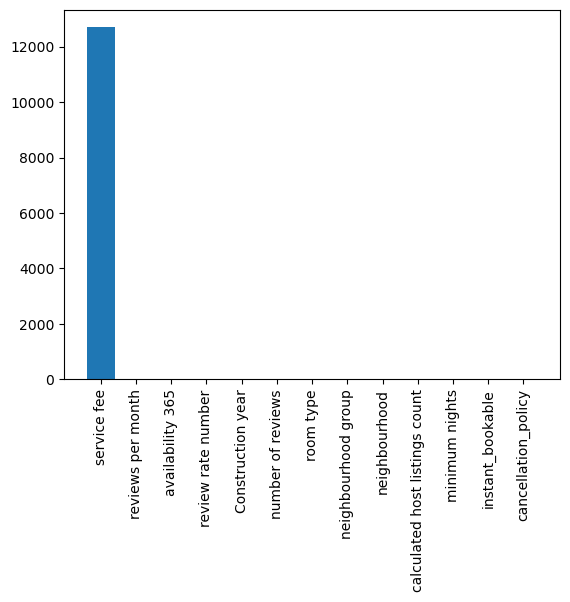

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def label_encode(df):
    label_encoder = LabelEncoder()

    # Apply Label Encoding untuk kolom kategori
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])

    return df

df_ANOVA = df
y = df_ANOVA['price']
X = df_ANOVA.drop(columns=['price'])

X_encoded = label_encode(X)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# Get feature names and scores
feature_names = X.columns
feature_scores = [(feature_names[i], fs.scores_[i]) for i in range(len(fs.scores_))]

# Sort features by score in descending order
sorted_features = sorted(feature_scores, key=lambda x: x[1], reverse=True)

# Print the sorted features and scores
for feature, score in sorted_features:
    print(f'Feature {feature}: {score}')

# Plot the scores
sorted_feature_names = [feature for feature, score in sorted_features]
sorted_scores = [score for feature, score in sorted_features]

pyplot.bar(sorted_feature_names, sorted_scores)
pyplot.xticks(rotation=90)  # Putar label x agar terbaca dengan jelas
pyplot.show()

## Kendall
Dilakukan seleksi fitur berdasarkan korelasi Kendall's tau untuk menentukan seberapa kuat hubungan setiap fitur dengan variabel target (price). Data terlebih dahulu dipersiapkan dengan menghilangkan kolom price sebagai fitur, dan melakukan Label Encoding pada kolom kategorikal agar dapat digunakan dalam model. Setelah itu, dataset dibagi menjadi set pelatihan dan pengujian. Fungsi kendall_feature_selection menghitung koefisien Kendall’s tau untuk setiap fitur terhadap target dan mengurutkan fitur berdasarkan nilai korelasi tersebut. Hasil seleksi fitur ini kemudian dicetak bersama dengan skor Kendall tau-nya, dan divisualisasikan dalam bentuk grafik batang untuk menunjukkan pentingnya masing-masing fitur dalam memprediksi harga.

Feature service fee: 0.9937384234456469
Feature availability 365: 0.007191414158617214
Feature review rate number: 0.005183586465323926
Feature neighbourhood: 0.0033013251533546848
Feature calculated host listings count: 0.002289856772241763
Feature number of reviews: 0.002266052100580834
Feature minimum nights: 0.0020518246715763885
Feature cancellation_policy: 0.0015783201132177104
Feature neighbourhood group: 0.0015282938591094008
Feature Construction year: 0.0009785743532357298
Feature instant_bookable: 0.000899566018334332
Feature room type: 0.0006536500005651914
Feature reviews per month: 0.0004030229035073428


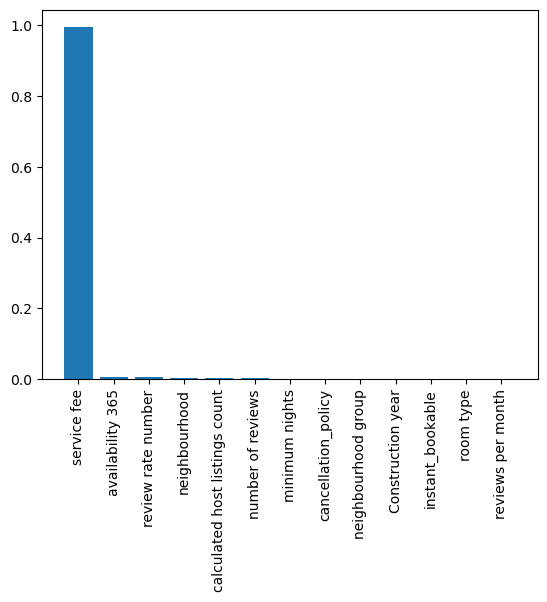

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import kendalltau
from matplotlib import pyplot

def kendall_feature_selection(X, y):
    # Menghitung korelasi Kendall antara setiap fitur dan target
    scores = []
    for col in X.columns:
        # Menghitung nilai Kendall's tau untuk setiap fitur terhadap target
        tau, _ = kendalltau(X[col], y)
        scores.append((col, abs(tau)))  # Mengambil nilai absolut dari tau untuk peringkat

    # Mengurutkan fitur berdasarkan skor Kendall tau secara menurun
    sorted_features = sorted(scores, key=lambda x: x[1], reverse=True)
    return sorted_features

def label_encode(df):
    label_encoder = LabelEncoder()

    # Apply Label Encoding untuk kolom kategori
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])

    return df

# Asumsikan df adalah DataFrame yang Anda miliki
df_Kendall = df
y = df_Kendall['price']
X = df_Kendall.drop(columns=['price'])

X_encoded = label_encode(X)

# Split menjadi train dan test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=1)

# Seleksi fitur menggunakan Kendall's tau
sorted_features = kendall_feature_selection(X_train, y_train)

# Print fitur-fitur yang telah diurutkan beserta skor Kendall tau-nya
for feature, score in sorted_features:
    print(f'Feature {feature}: {score}')

# Plotting skor
sorted_feature_names = [feature for feature, score in sorted_features]
sorted_scores = [score for feature, score in sorted_features]

pyplot.bar(sorted_feature_names, sorted_scores)
pyplot.xticks(rotation=90)  # Putar label x agar terbaca dengan jelas
pyplot.show()


Dengan seleksi fitur ANOVA didapatkan 4 fitur dengan relevansi tertinggi yaitu
1. Feature service fee: 12699.198900810508
2. Feature reviews per month: 1.6283327238282588
3. Feature availability 365: 1.5022214564887437
4. Feature review rate number: 1.468708482463334

Dengan seleksi fitur Kendall didapatkan 4 fitur dengan relevansi tertinggi yaitu
1. Feature service fee: 0.9937384234456469
2. Feature availability 365: 0.007191414158617214
3. Feature review rate number: 0.005183586465323926
4. Feature neighbourhood: 0.0033013251533546848

# Analisis Statistik dan Visualisasi

Data yang divisualisasikan adalah fitur dengan relevansi tinggi dari seleksi fitur yang dilakukan yaitu
1. Feature service fee
2. Feature reviews per month
3. Feature availability 365
5. Feature review rate number
6. Feature neighbourhood

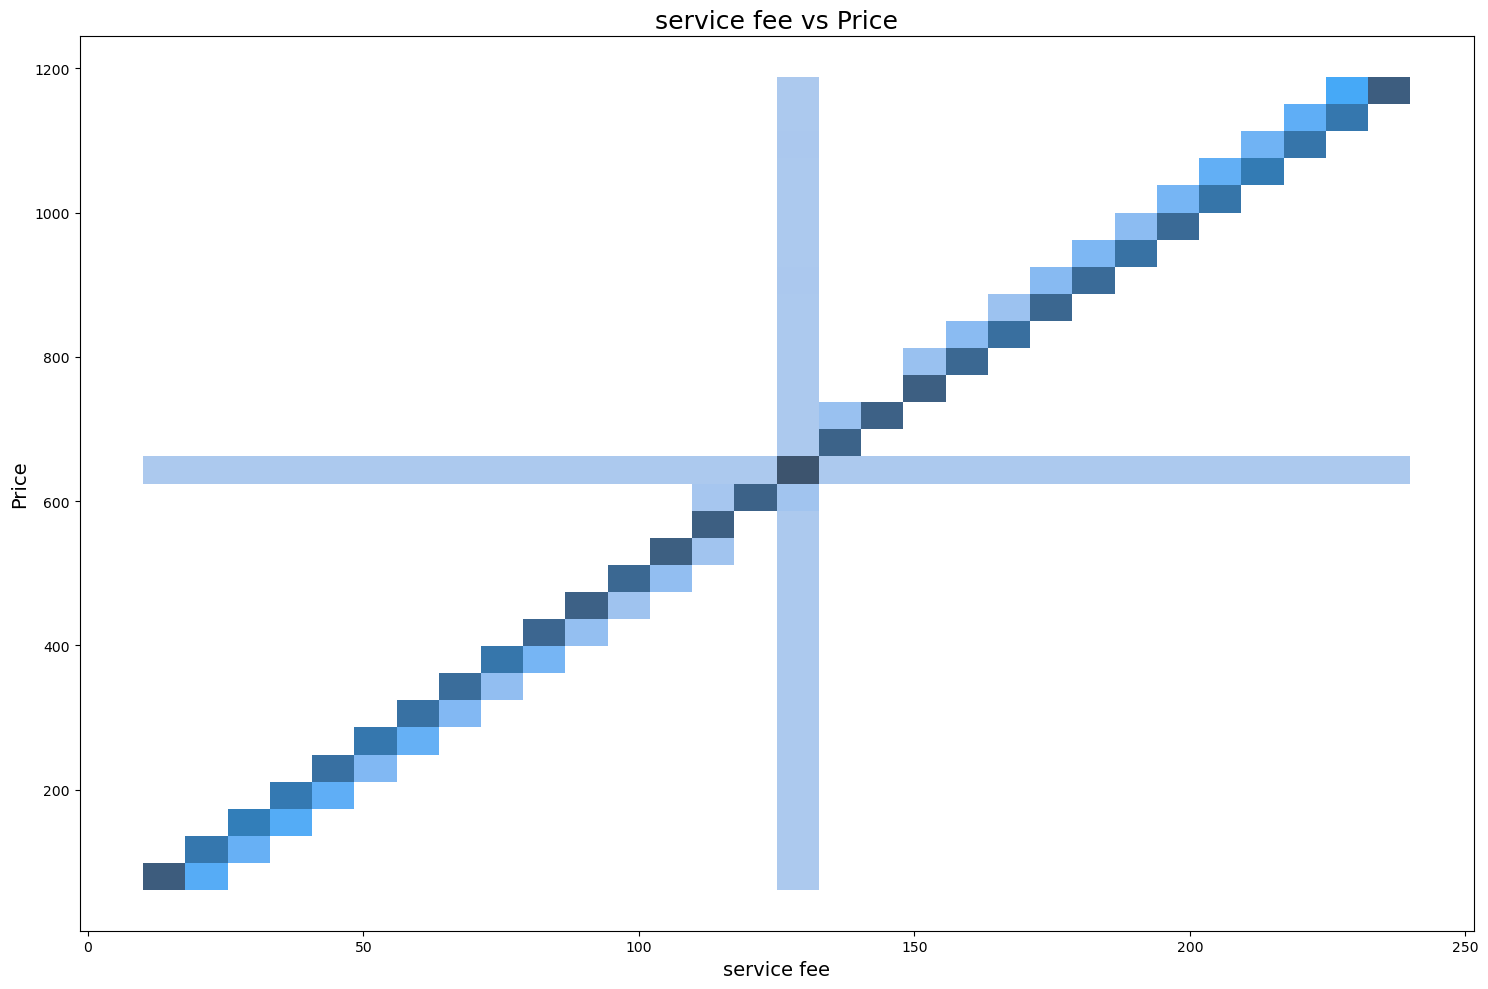

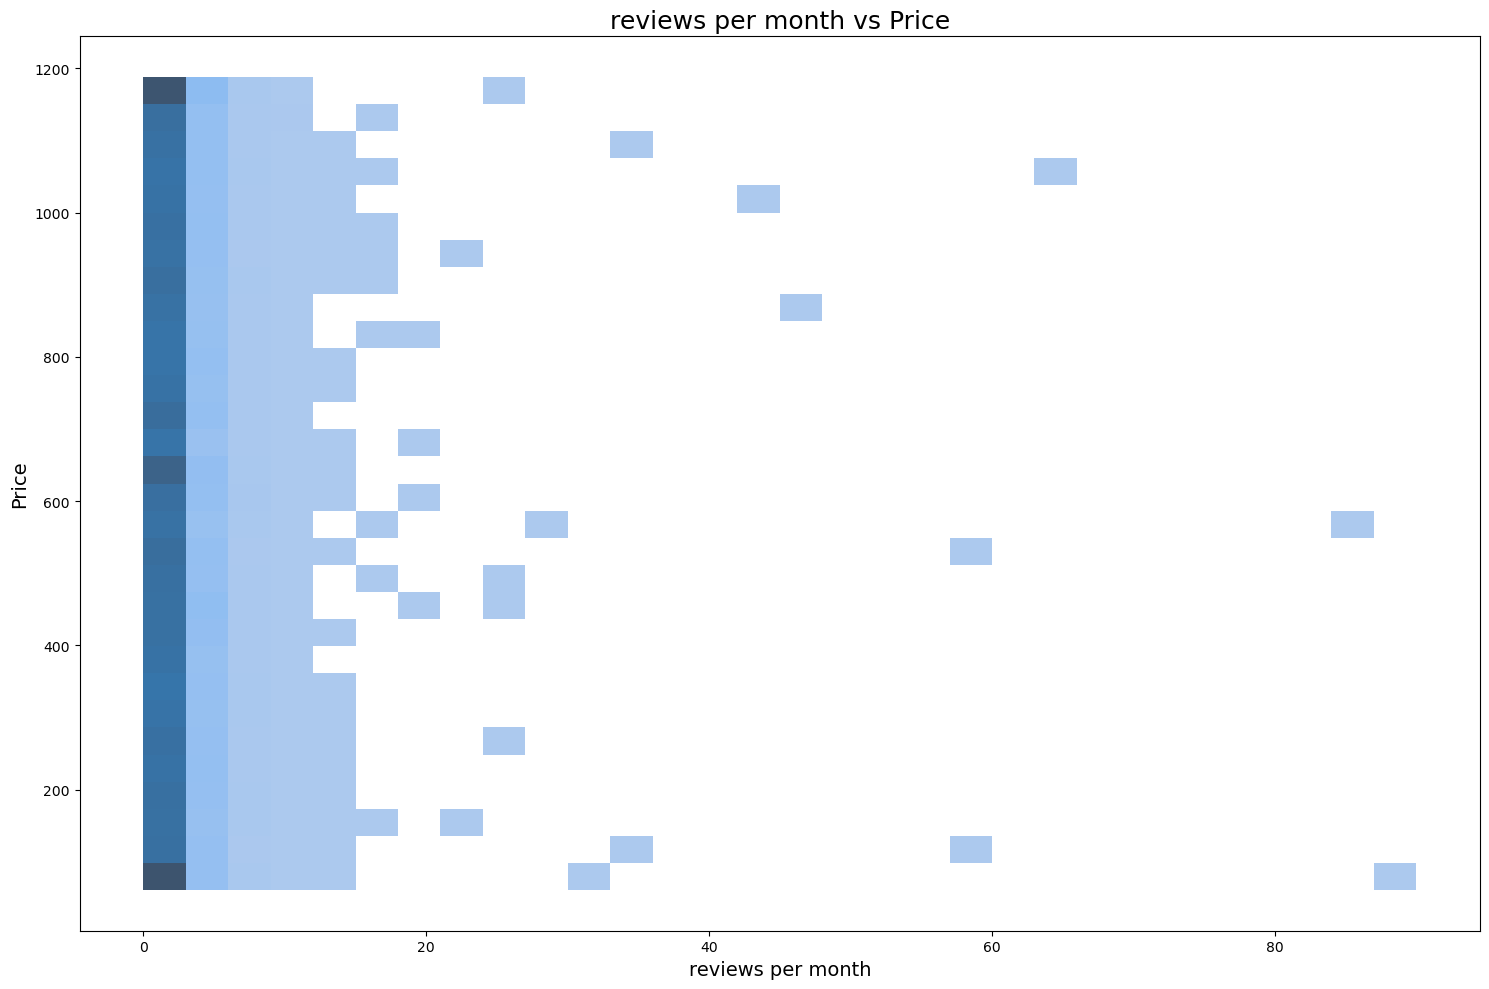

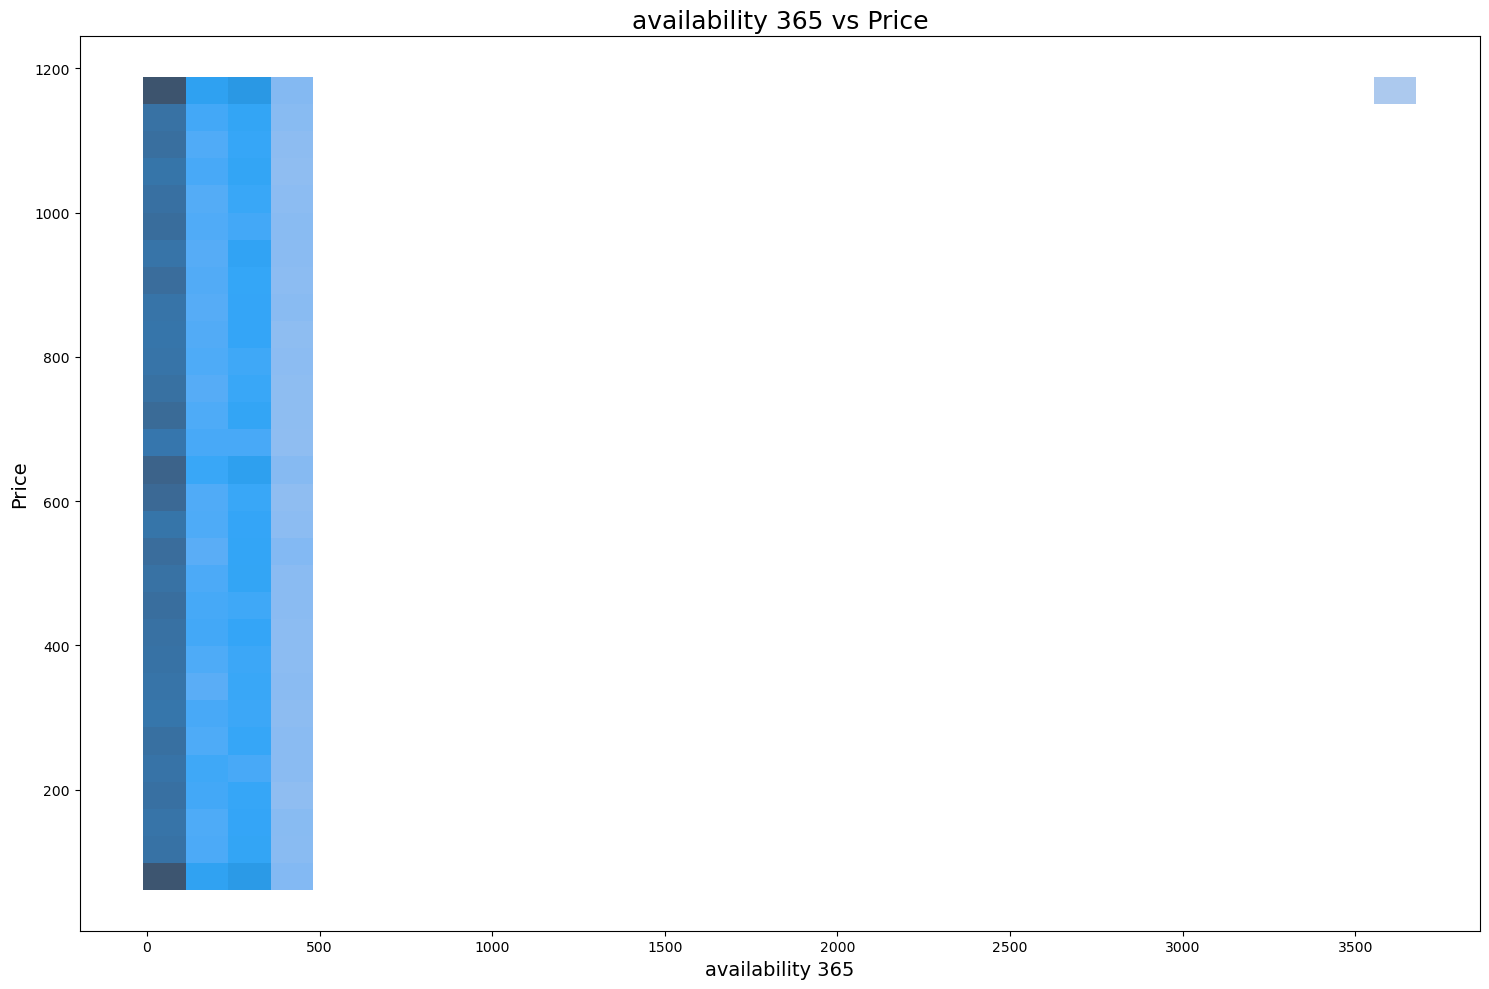

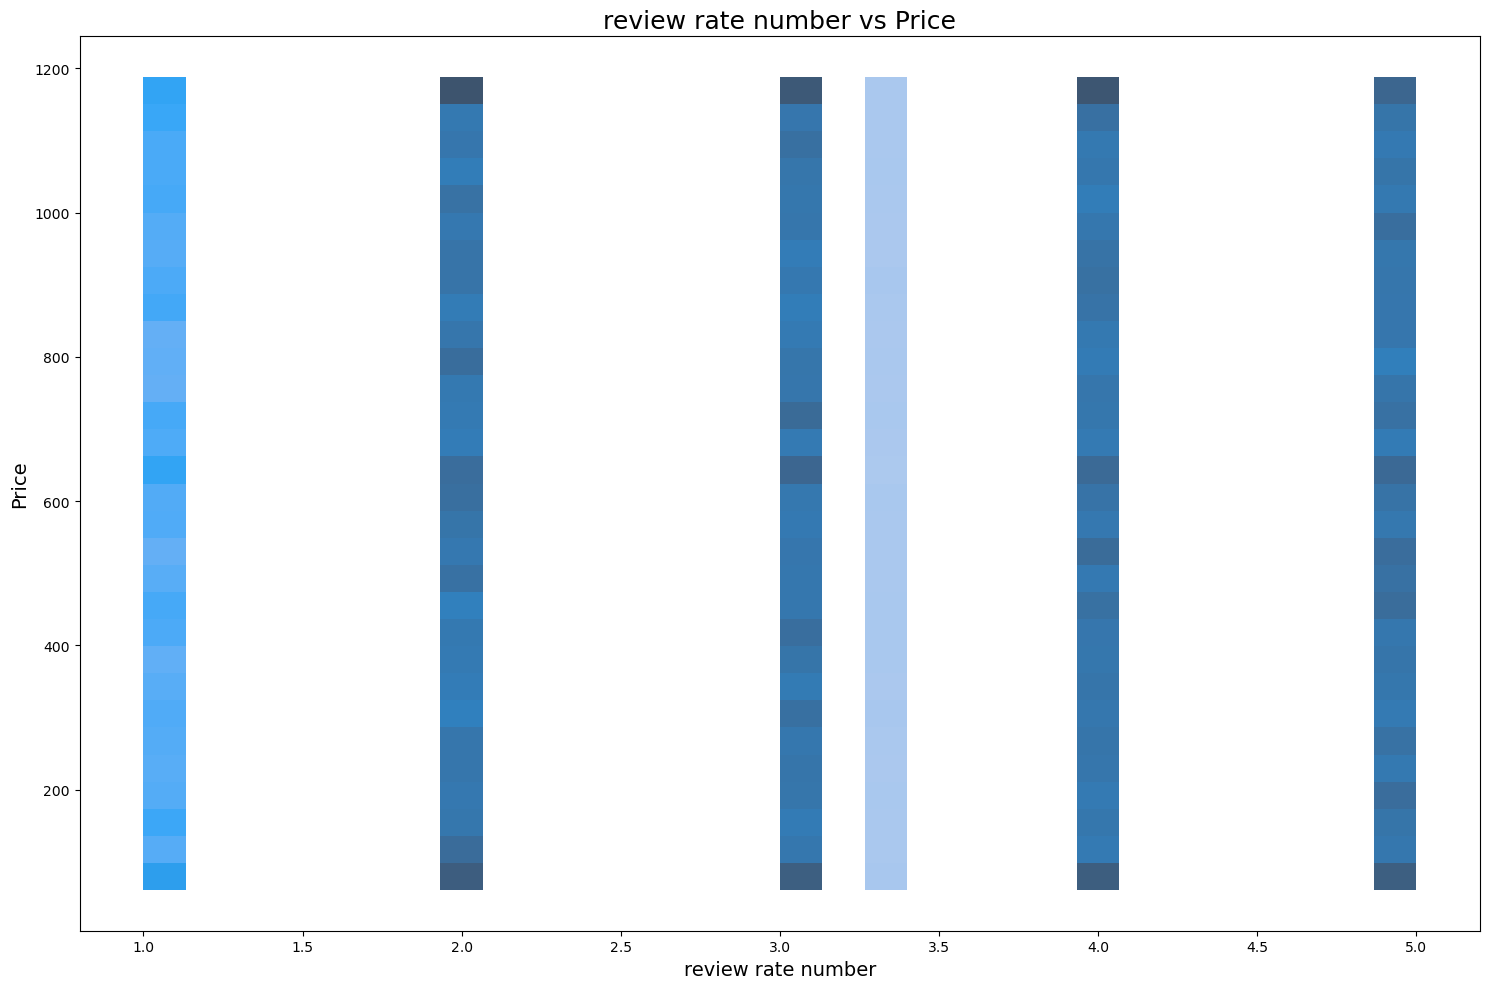

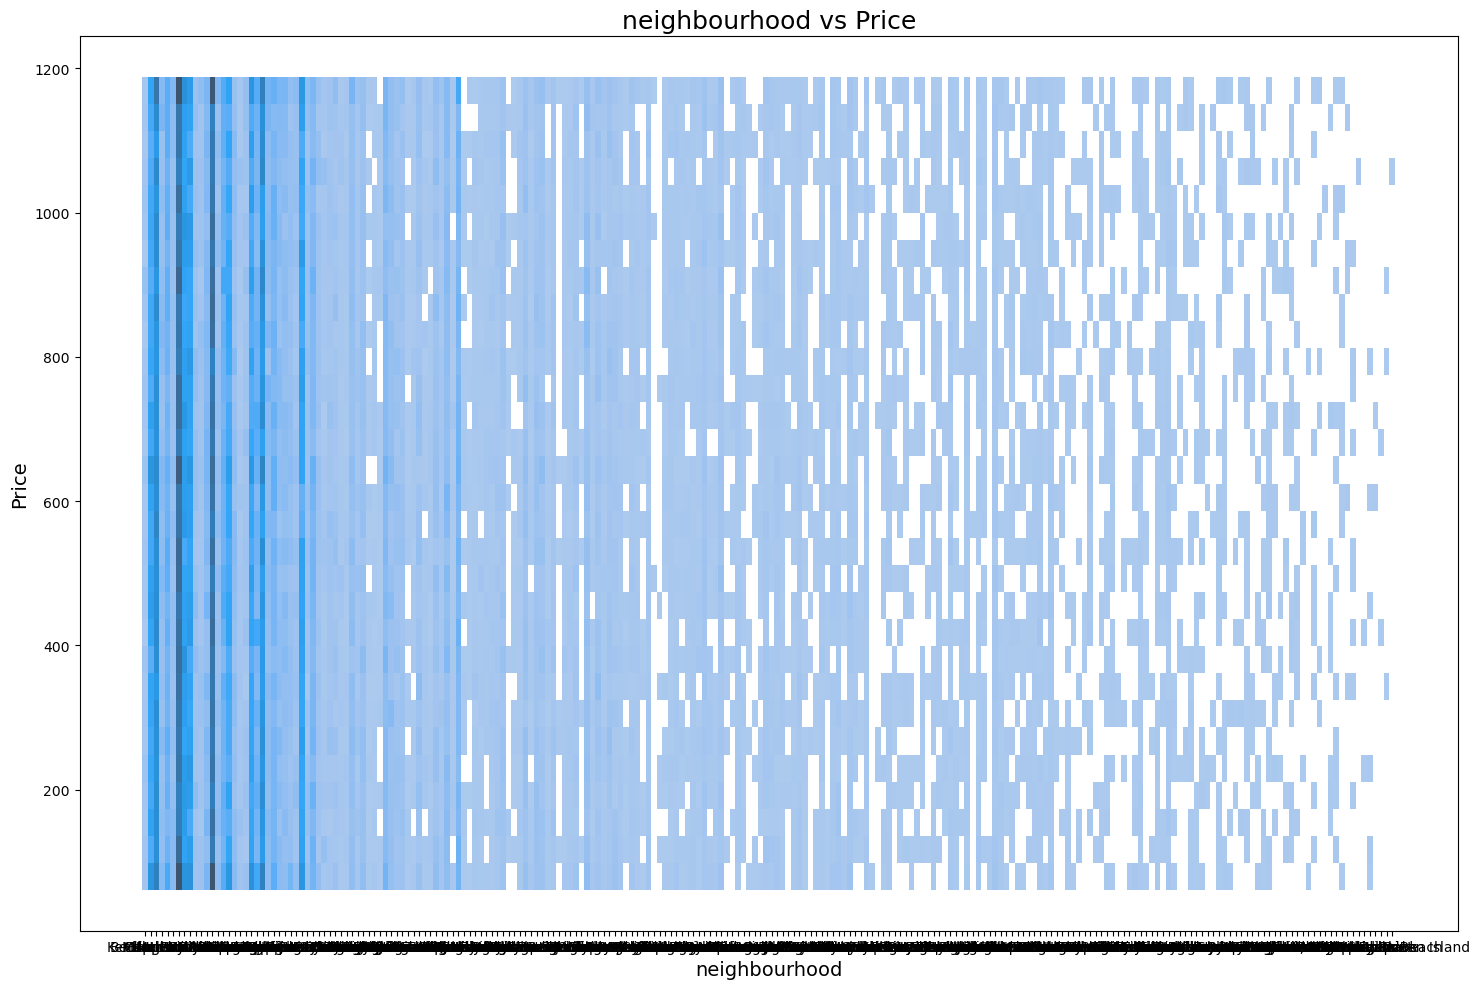

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan fitur-fitur yang akan dibandingkan dengan 'Price'
features = ['service fee', 'reviews per month',  'availability 365', 'review rate number', 'neighbourhood']

# Loop untuk membuat histogram setiap fitur dibandingkan dengan Price
for feature in features:
    plt.figure(figsize=(15, 10))  # Ukuran grafik diperbesar
    sns.histplot(data=df, x=feature, y='price', bins=30, kde=True)
    plt.title(f'{feature} vs Price', fontsize=18)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.tight_layout()
    plt.show()


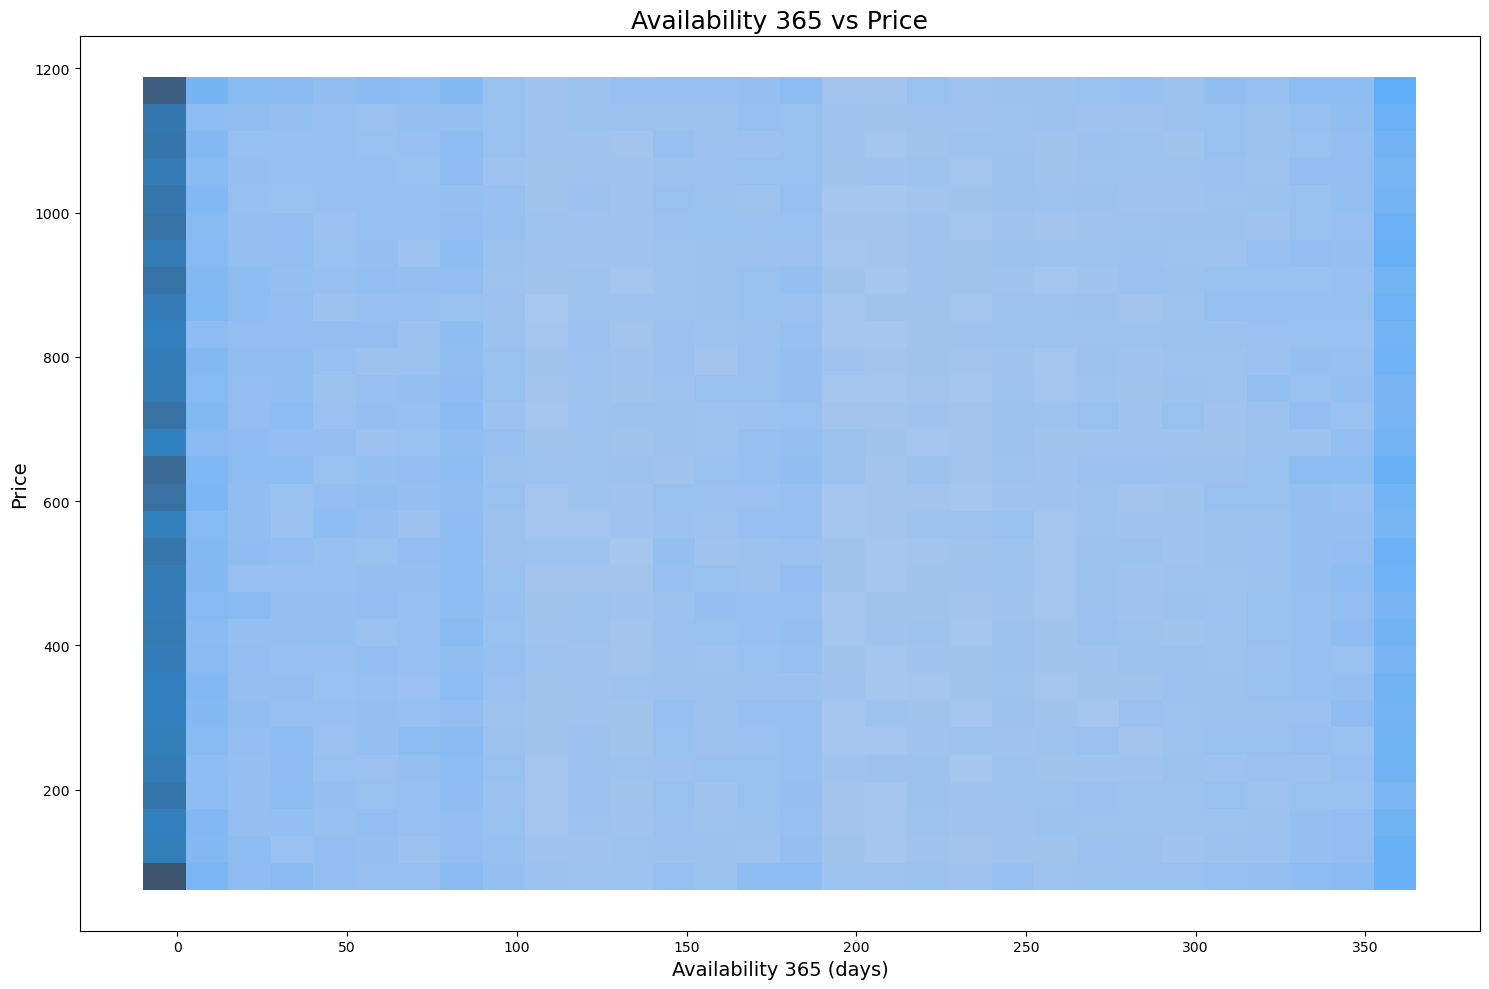

In [ ]:
plt.figure(figsize=(15, 10))  # Ukuran grafik diperbesar
sns.histplot(data=df[df['availability 365'] <= 365], x='availability 365', y='price', bins=30, kde=True)
plt.title('Availability 365 vs Price', fontsize=18)
plt.xlabel('Availability 365 (days)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.show()

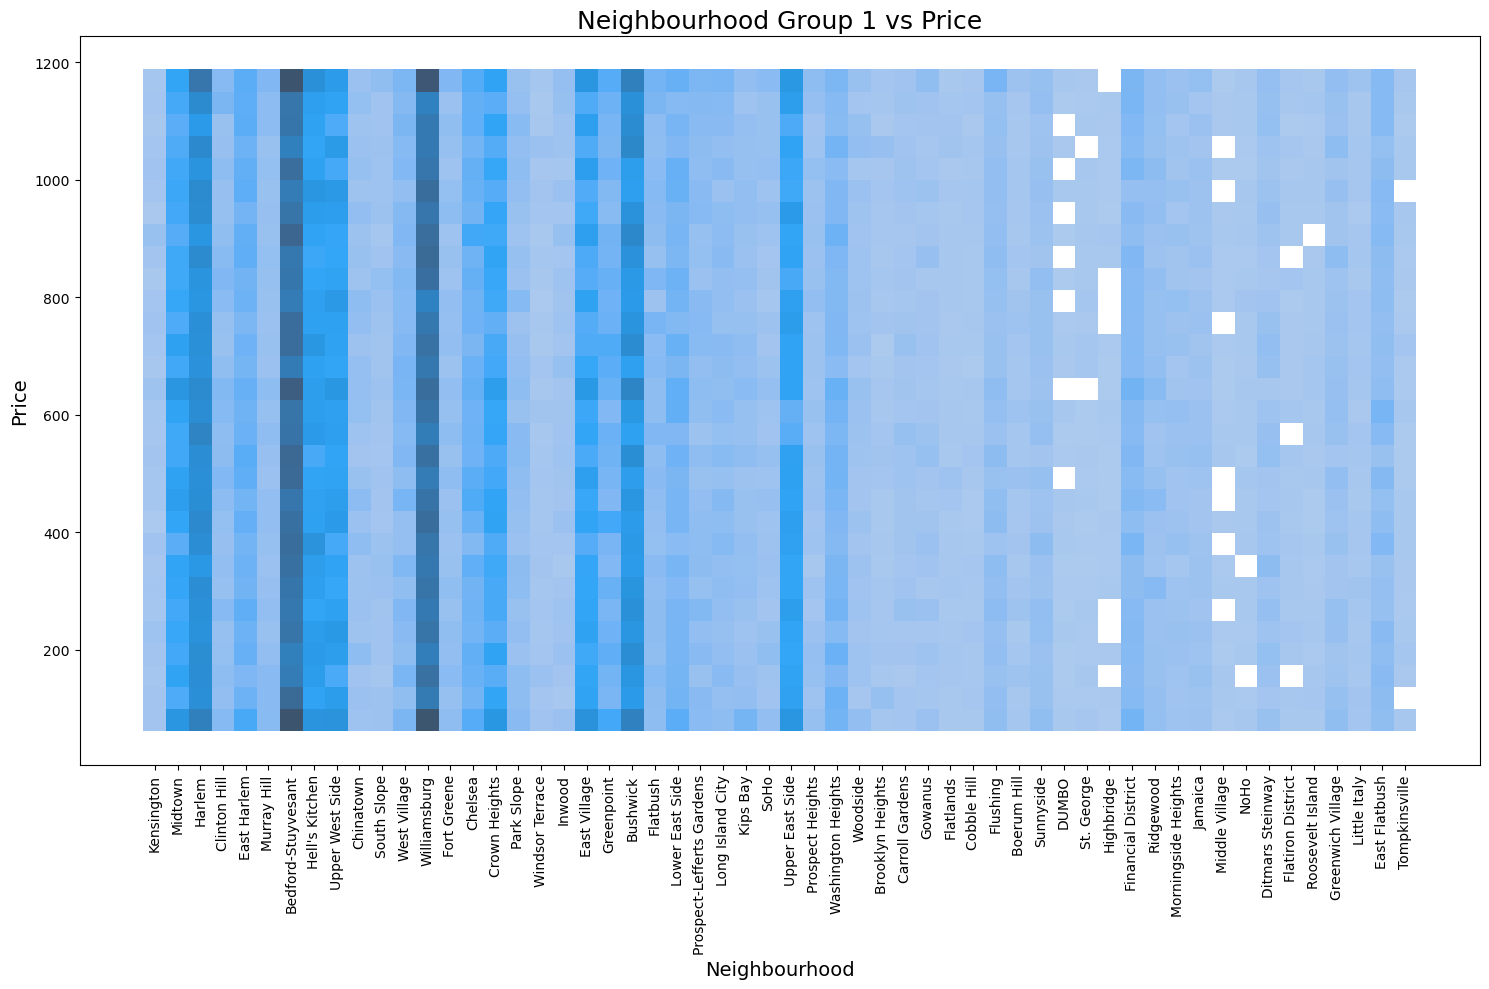

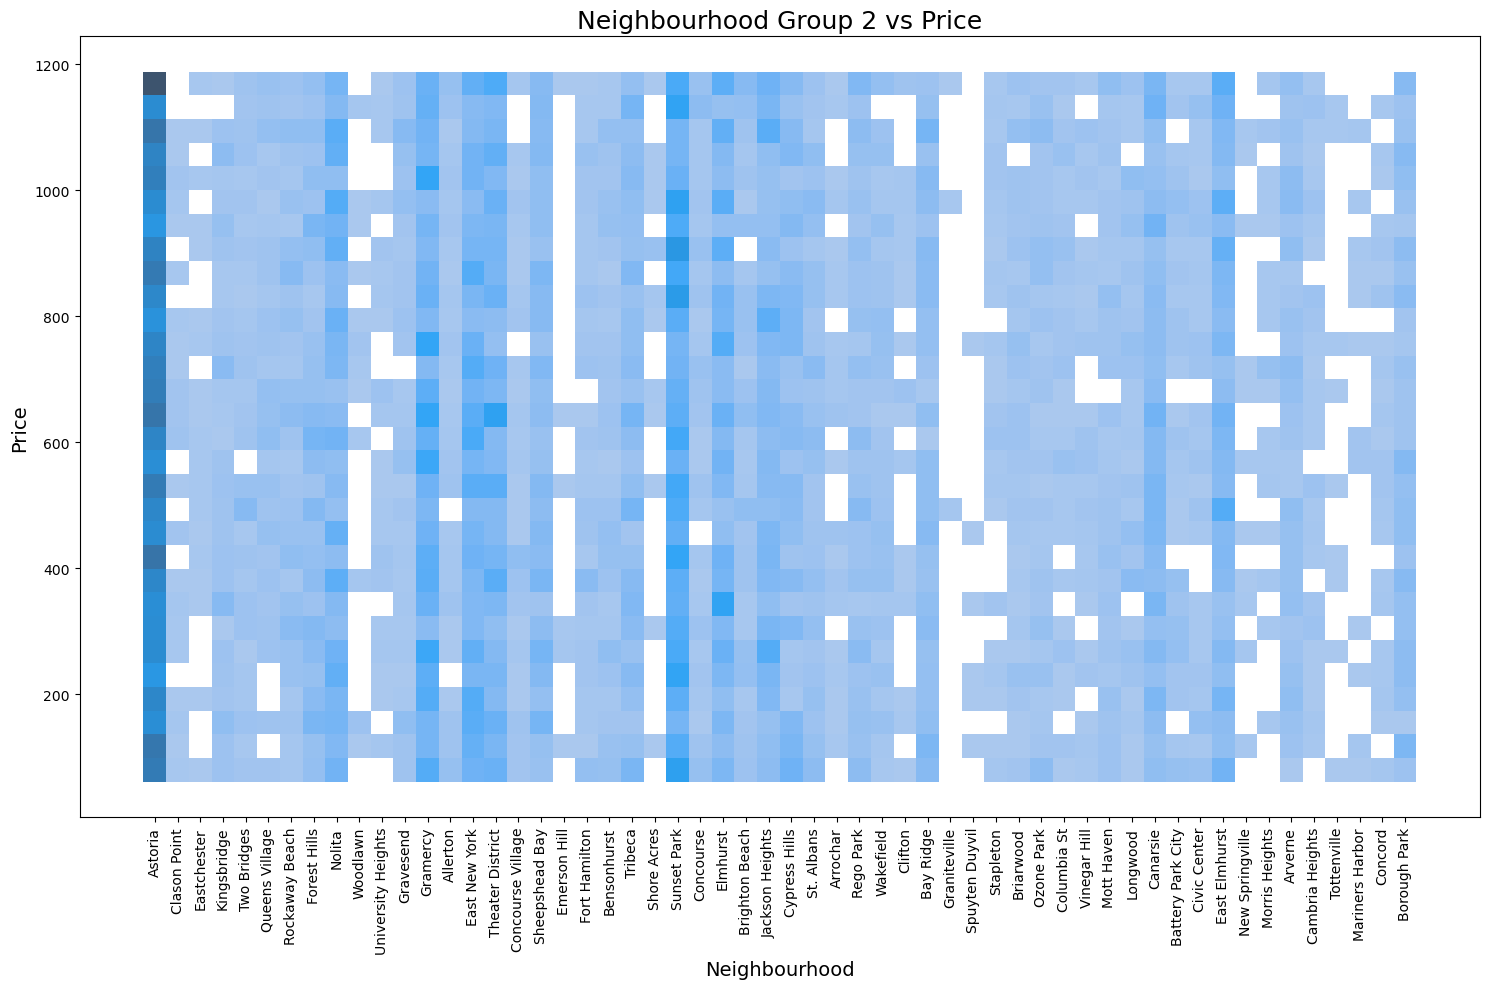

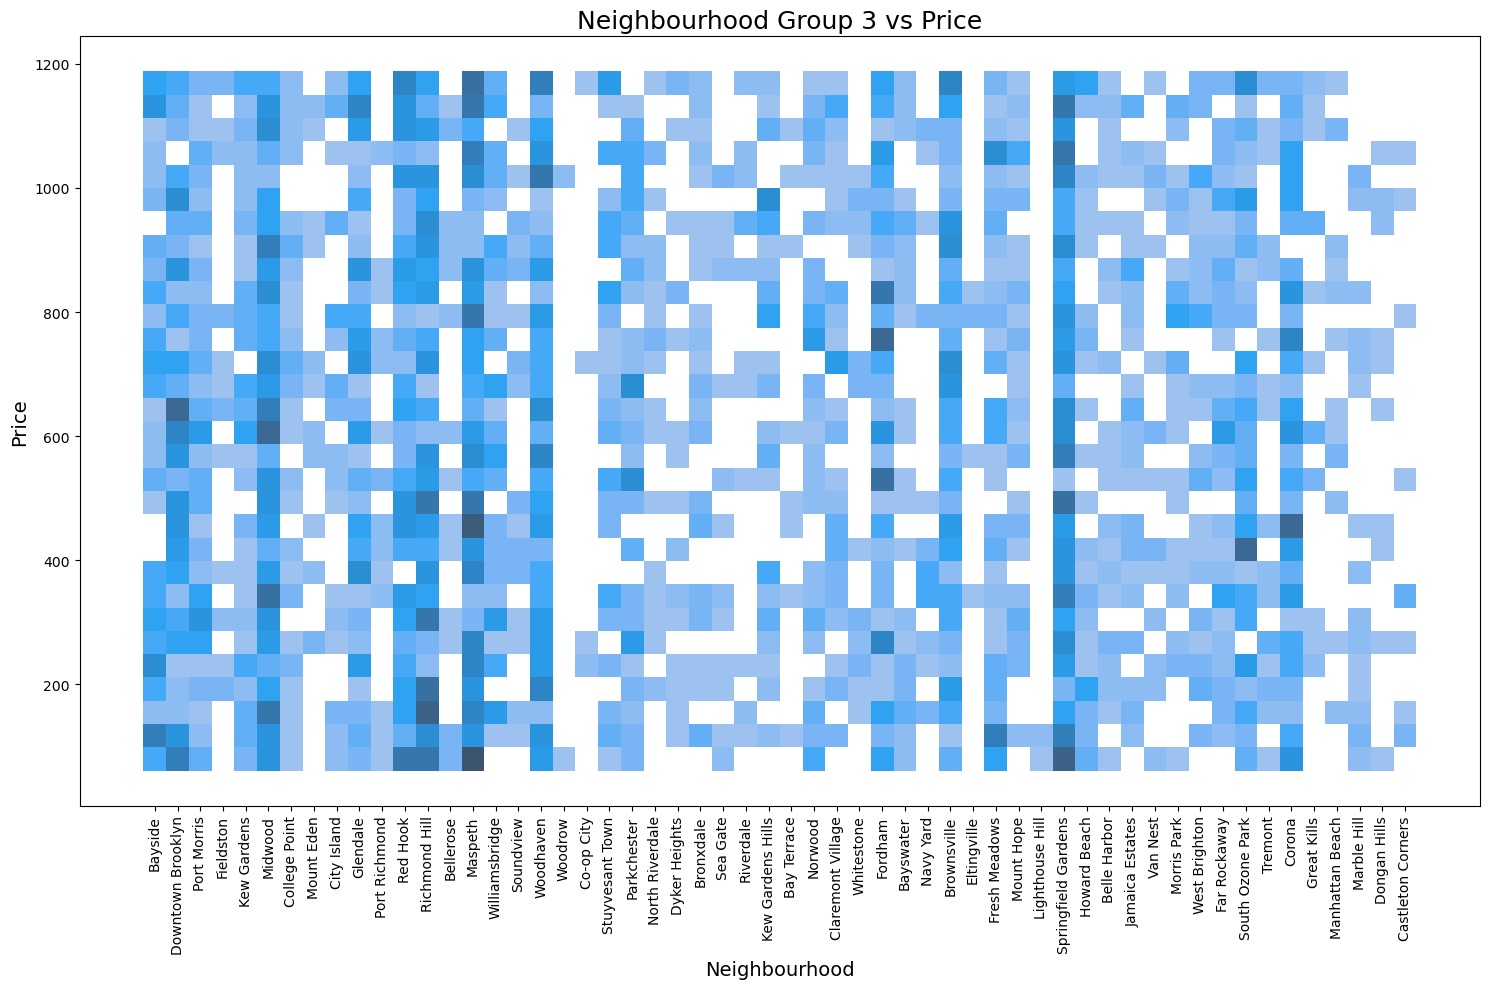

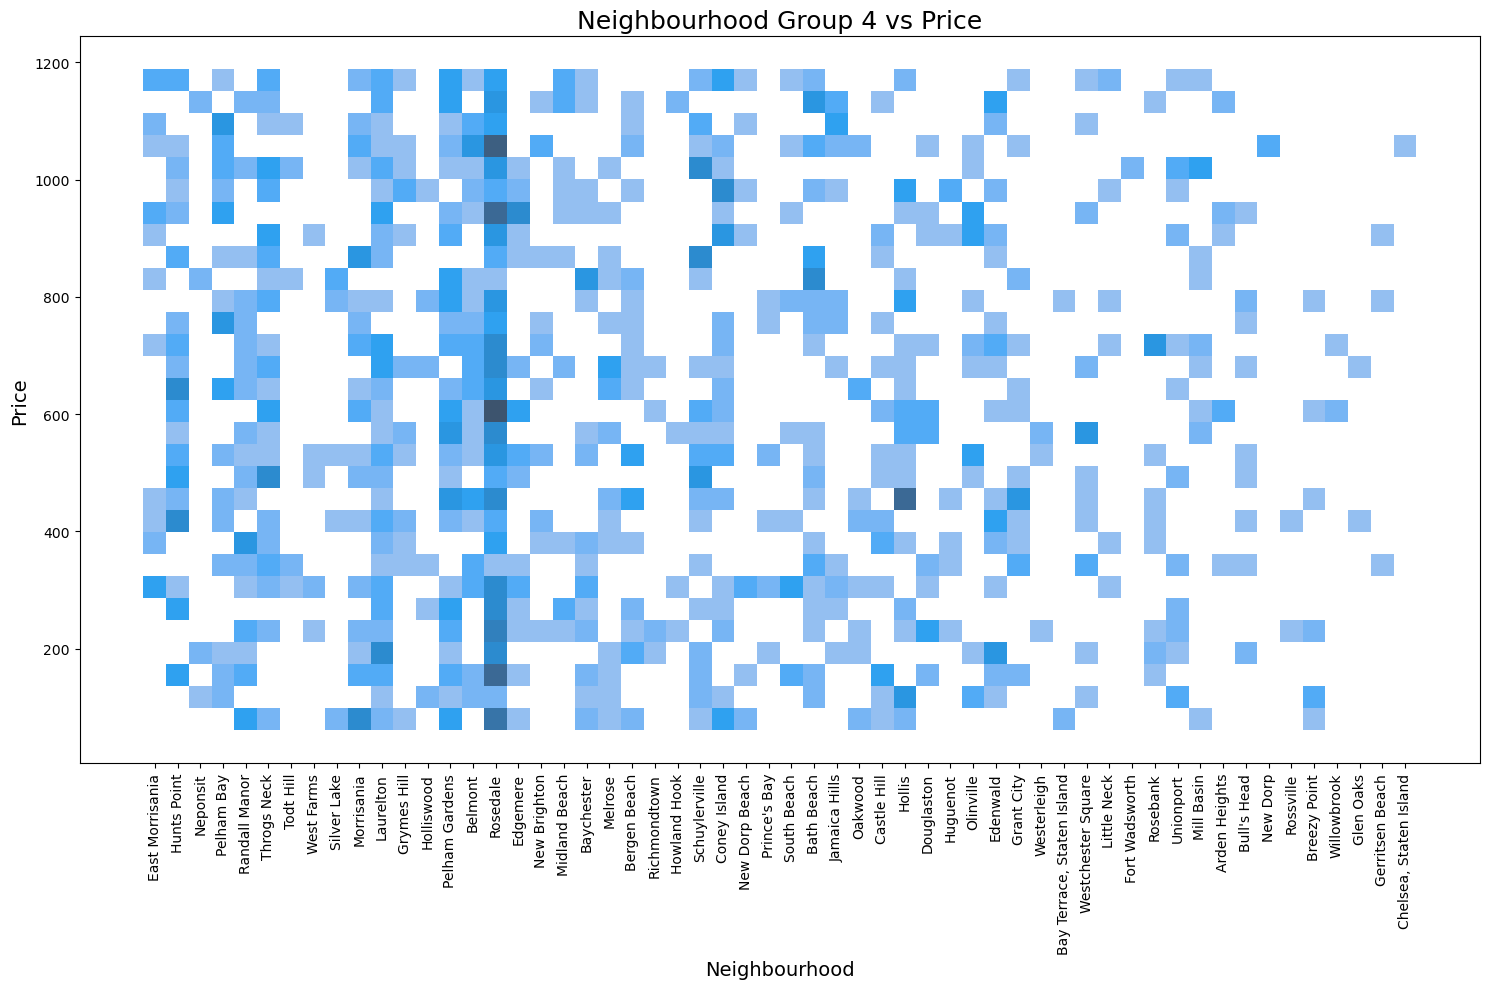

In [ ]:
# Detail Visualisasi Neigbourhood
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan fitur-fitur yang akan dibandingkan dengan 'Price'
features = ['service fee', 'reviews per month', 'room type', 'availability 365', 'house_rules']

# Kolom 'neighbourhood' yang memiliki banyak nilai unik
neighbourhood_unique = df['neighbourhood'].unique()

# Membagi nilai unik 'neighbourhood' menjadi kelompok dengan maksimal 56 nilai per kelompok
num_groups = (len(neighbourhood_unique) // 56) + 1  # Menentukan jumlah kelompok
neighbourhood_groups = [neighbourhood_unique[i:i + 56] for i in range(0, len(neighbourhood_unique), 56)]

# Membuat histogram untuk setiap grup neighbourhood
for group_idx, group in enumerate(neighbourhood_groups):
    plt.figure(figsize=(15, 10))  # Ukuran grafik diperbesar
    sns.histplot(data=df[df['neighbourhood'].isin(group)], x='neighbourhood', y='price', bins=30, kde=True)
    plt.title(f'Neighbourhood Group {group_idx+1} vs Price', fontsize=18)
    plt.xlabel('Neighbourhood', fontsize=14)
    plt.ylabel('Price', fontsize=14)
    plt.xticks(rotation=90)  # Agar nama neighbourhood terbaca dengan jelas
    plt.tight_layout()
    plt.show()


Diatas merupakan visualisasi dari kelima fitur terhadap harga dari AirBnB. Availability 365 divisualisasikan lagi supaya dapat dilihat dengan lebih detail pembagian harga berdasarkan ketersediaan AirBnB sepanjang tahun. Neighbourhood divisualisasikan secara terpisah untuk menunjukkan harga dari AirBnB disetiap wilayah dengan lebih detail. Penjelasan masing-masing visualisasi akan diberikan dengan lebih detail pada laporan

# Kesimpulan

Berdasarkan analisis seleksi fitur menggunakan metode ANOVA dan Kendall, ditemukan bahwa faktor-faktor seperti service fee memiliki pengaruh signifikan terhadap harga sewa properti di AirBnB. Seleksi fitur dilakukan dengan ANOVA dan Kendall dan didapatkan kesimpulan fitur yang dianggap paling berpengaruh dalam harga sewa AirBnB adalah service fee, reviews per month, availability 365, review rate number, dan neighbourhood. Dari hasil ini, dapat disimpulkan bahwa pemilik properti harus mempertimbangkan faktor-faktor ini dalam strategi penetapan harga, dan platform Airbnb dapat menggunakan informasi ini untuk menyarankan harga yang lebih optimal, meningkatkan daya tarik properti di pasar yang kompetitif.